In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
#plt.style.use(mplhep.style.CMS)

In [2]:
#proton_selection = "SingleRP"
proton_selection = "MultiRP"

# Signal

In [3]:
df_signal = None
event_counts_signal = None
selections_str_signal = None
#with h5py.File('output/output-MC2017-Elastic-PreSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-Elastic-ExclSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-SingleDissociation-PreSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-SingleDissociation-ExclSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-Elastic-Non3+3-PreSel.h5', 'r') as f:
with h5py.File('output/output-MC2017-SingleDissociation-Non3+3-PreSel.h5', 'r') as f:
    print ( list(f.keys()) )
    dset = f['protons']
    print ( dset.shape )
    print ( dset[:,:] )
    dset_columns = f['columns']
    print ( dset_columns.shape )
    columns = list( dset_columns )
    print ( columns )
    columns_str = [ item.decode("utf-8") for item in columns ]
    print ( columns_str )
    
    dset_counts = f['event_counts']
    event_counts_signal = list( dset_counts )
    print ( event_counts_signal )
    
    dset_selections = f['selections']
    selections_ = list( dset_selections )
    print ( selections_ )
    selections_str_signal = [ item.decode("utf-8") for item in selections_ ]
    print ( selections_str_signal )
    
    df_signal = pd.DataFrame( dset, columns=columns_str )
    
    print ( df_signal )

['columns', 'event_counts', 'protons', 'selections']
(132029, 38)
[[1.0000000e+00 1.0000000e+00 4.2949673e+09 ... 2.1874566e-04
  1.1144166e-01 1.8833050e-03]
 [1.0000000e+00 1.0000000e+00 4.2949673e+09 ... 2.1874566e-04
  1.1144166e-01 1.8833050e-03]
 [1.0000000e+00 1.0000000e+00 4.2949673e+09 ... 2.1874566e-04
  1.1144166e-01 1.8833050e-03]
 ...
 [1.0000000e+00 2.2500000e+02 4.2949673e+09 ... 1.9357237e-03
  7.6742142e-02 3.8848533e-03]
 [1.0000000e+00 2.2500000e+02 4.2949673e+09 ... 1.9357237e-03
  7.6742142e-02 3.8848533e-03]
 [1.0000000e+00 2.2500000e+02 4.2949673e+09 ... 1.9357237e-03
  7.6742142e-02 3.8848533e-03]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'Muon0Pt', b'Muon0Eta', b'Muon0Phi', b'Muo

In [4]:
df_counts_signal = pd.Series( event_counts_signal, index=selections_str_signal);
df_counts_signal

All        178174
Muon       169697
Vertex     158616
Protons     56625
dtype: int64

In [5]:
msk_invmass = ( df_signal["InvMass"] >= 110. )
df_signal = df_signal[msk_invmass]
df_signal

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,1.0,1.0,4.294967e+09,3.0,150.0,0.0,-999.0,3.0,-1.0,13.247070,...,90.351357,2.261688,1.928109,0.428011,0.424056,188.305267,1.0,0.000219,0.111442,0.001883
1,1.0,1.0,4.294967e+09,3.0,150.0,0.0,-999.0,23.0,-1.0,13.377808,...,90.351357,2.261688,1.928109,0.428011,0.424056,188.305267,1.0,0.000219,0.111442,0.001883
2,1.0,1.0,4.294967e+09,3.0,150.0,1.0,0.0,3.0,23.0,13.247070,...,90.351357,2.261688,1.928109,0.428011,0.424056,188.305267,1.0,0.000219,0.111442,0.001883
3,1.0,1.0,4.294967e+09,15.0,150.0,0.0,-999.0,23.0,-1.0,2.143066,...,54.763481,-1.060142,-1.017995,-3.671344,-3.675518,225.314072,0.0,0.002158,0.023009,0.013057
4,1.0,1.0,4.294967e+09,17.0,150.0,0.0,-999.0,3.0,-1.0,2.689453,...,77.358459,-1.278425,-1.259489,4.341810,4.341201,288.467133,6.0,0.698762,0.026775,0.023218
5,1.0,1.0,4.294967e+09,17.0,150.0,0.0,-999.0,23.0,-1.0,2.750336,...,77.358459,-1.278425,-1.259489,4.341810,4.341201,288.467133,6.0,0.698762,0.026775,0.023218
6,1.0,1.0,4.294967e+09,20.0,150.0,0.0,-999.0,103.0,-1.0,3.531494,...,115.335823,-1.117552,-2.905547,-2.884175,-2.886598,246.306458,0.0,0.036674,0.006029,0.060007
7,1.0,1.0,4.294967e+09,20.0,150.0,0.0,-999.0,123.0,-1.0,3.391632,...,115.335823,-1.117552,-2.905547,-2.884175,-2.886598,246.306458,0.0,0.036674,0.006029,0.060007
8,1.0,1.0,4.294967e+09,20.0,150.0,1.0,1.0,103.0,123.0,3.531494,...,115.335823,-1.117552,-2.905547,-2.884175,-2.886598,246.306458,0.0,0.036674,0.006029,0.060007
9,1.0,1.0,4.294967e+09,27.0,150.0,0.0,-999.0,23.0,-1.0,2.067139,...,128.450089,0.640535,2.557375,-3.028224,-3.026186,341.143219,0.0,0.000579,0.022974,0.029980


In [6]:
df_signal_events = df_signal.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
df_signal_events = df_signal_events[ ~df_signal_events.index.duplicated(keep='first') ]

#msk_invmass = ( df_signal_events["InvMass"] >= 110. )
#df_signal_events = df_signal_events[msk_invmass]

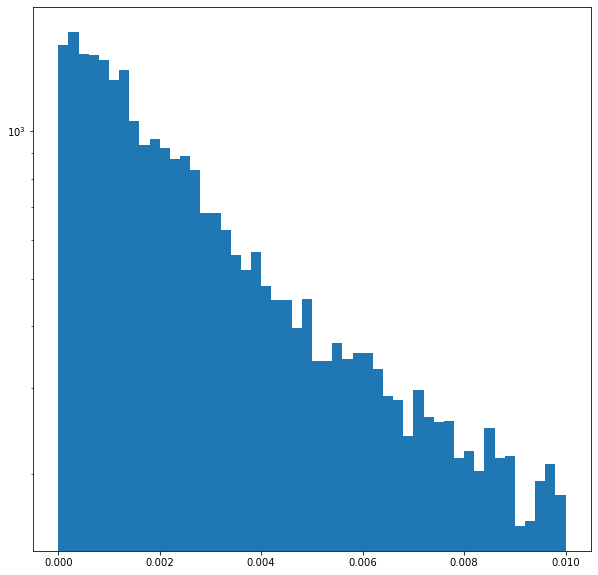

In [7]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["Acopl"], bins=50, range=(0.,0.01) )
plt.yscale( "log" )

(array([29453., 11004.,  4815.,  2542.,  1439.,  1017.,   718.,   551.,
          417.,   317.,   241.,   190.,   138.,   108.,   120.,   103.,
           75.,    77.,    66.,   111.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

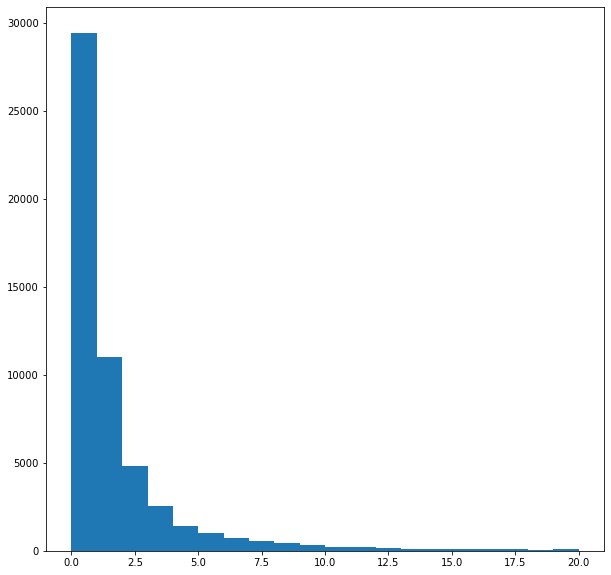

In [8]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["ExtraPfCands"], bins=20, range=(0.,20) )
#plt.yscale( "log" )

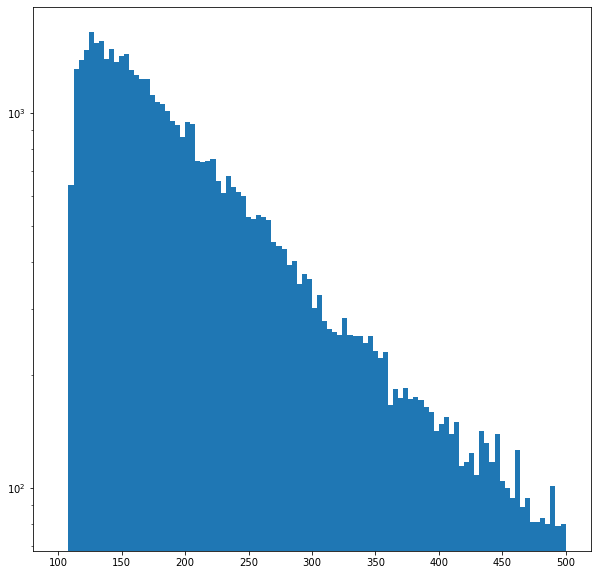

In [9]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["InvMass"], bins=100, range=(100.,500) )
plt.yscale( "log" )

6351 6031


(0.0, 0.15)

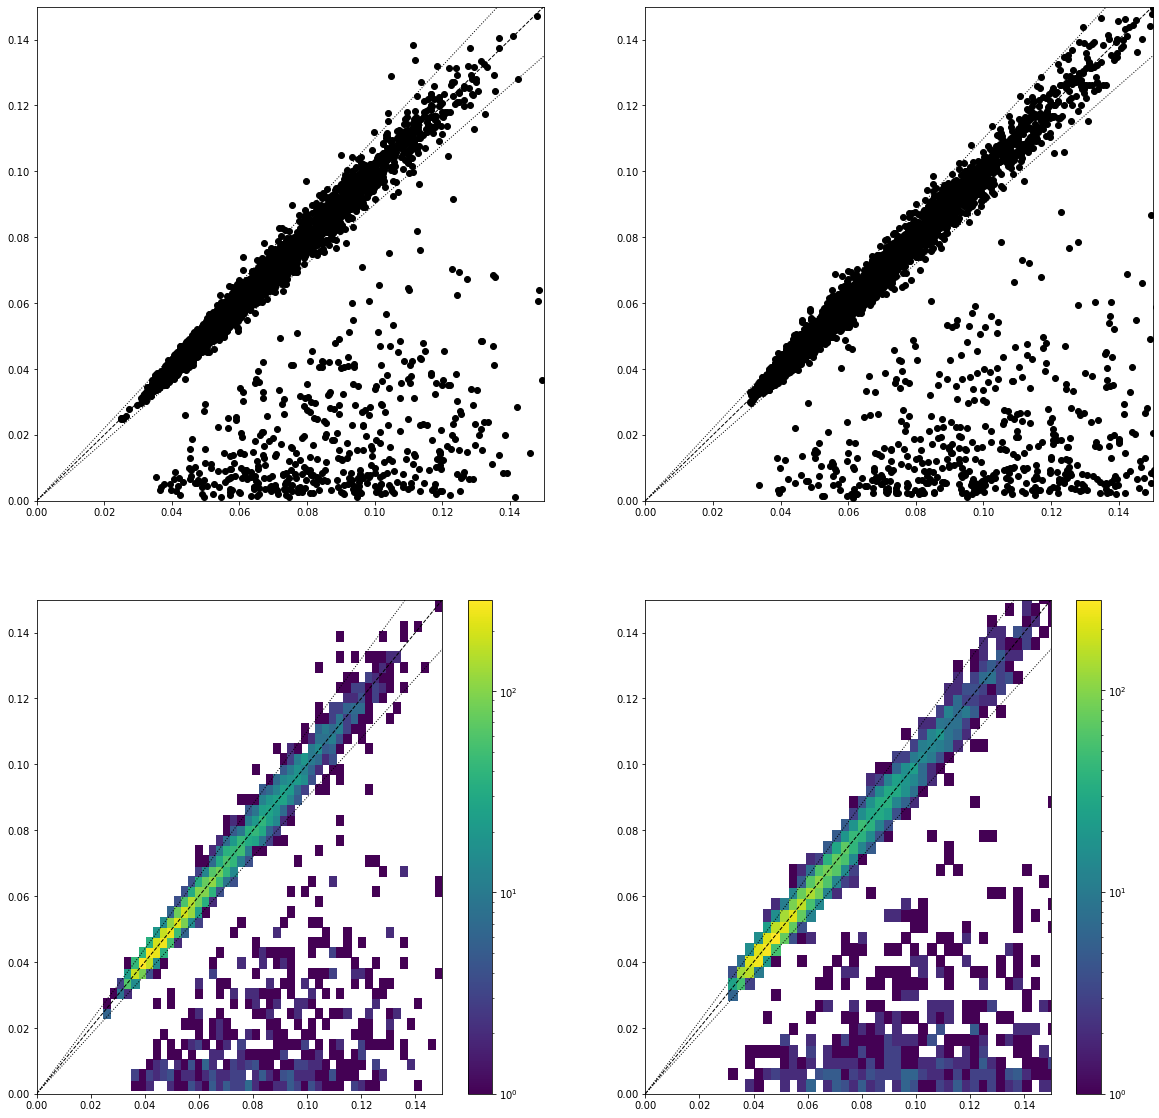

In [10]:
msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )
#msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 0 )

#msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
#msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
#msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
#msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

msk1 = None
msk2 = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

print ( len(df_signal[ "Xi" ][ msk1 ]), len(df_signal[ "Xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_signal[ "Xi" ][ msk1 ], df_signal[ "XiMuMuPlus" ][ msk1 ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_signal[ "Xi" ][ msk2 ], df_signal[ "XiMuMuMinus" ][ msk2 ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_signal[ "Xi" ][ msk1 ], df_signal[ "XiMuMuPlus" ][ msk1 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_signal[ "Xi" ][ msk2 ], df_signal[ "XiMuMuMinus" ][ msk2 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

(array([8.000e+00, 5.000e+00, 5.000e+00, 4.000e+00, 5.000e+00, 4.000e+00,
        9.000e+00, 1.000e+01, 7.000e+00, 6.000e+00, 9.000e+00, 7.000e+00,
        6.000e+00, 8.000e+00, 4.000e+00, 7.000e+00, 1.100e+01, 8.000e+00,
        1.100e+01, 8.000e+00, 8.000e+00, 1.900e+01, 7.000e+00, 7.000e+00,
        1.100e+01, 7.000e+00, 1.300e+01, 1.000e+01, 4.000e+00, 4.000e+00,
        9.930e+02, 4.479e+03, 1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([-5.  , -4.84, -4.68, -4.52, -4.36, -4.2 , -4.04, -3.88, -3.72,
        -3.56, -3.4 , -3.24, -3.08, -2.92, -2.76, -2.6 , -2.44, -2.28,
        -2.12, -1.96, -1.8 , -1.64, -1.48, -1.32, -1.16, -1.  , -0.84,
        -0.68, -0.52, -0.36, -0.2 , -0.04,  0.12,  0.28,  0.44,  0.6 ,
         0.76,  0.92,  1.08,  1.24,  1.4 ,  1.56,  1.72,  1.88,  2.04,
         2.2 ,  2.36,

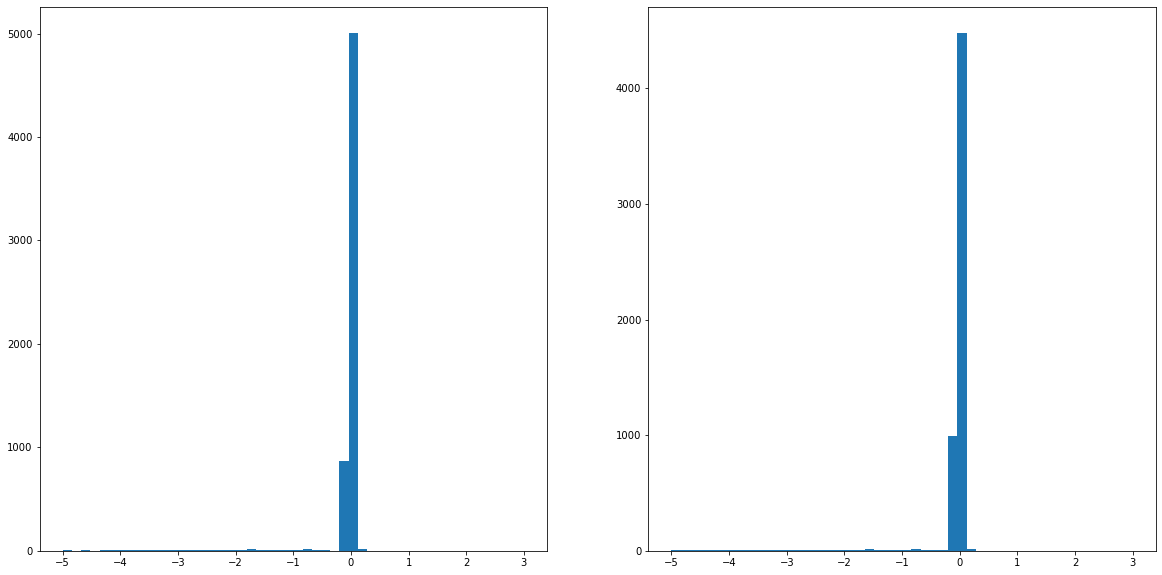

In [11]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist( ( 1. - df_signal[ "Xi" ][ msk1 ] / df_signal[ "XiMuMuPlus" ][ msk1 ] ), bins=50, range=(-5.,3.) )
axes[1].hist( ( 1. - df_signal[ "Xi" ][ msk2 ] / df_signal[ "XiMuMuMinus" ][ msk2 ] ), bins=50, range=(-5.,3.) )

# Data

In [12]:
df_data_list = []
df_counts_data_list = []

#resample_factor = 1
#resample_factor = 20

#with h5py.File('output/output-UL2017B-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017B-Excl.h5', 'r') as f:    
#with h5py.File('output/output-UL2017C1-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017C1-Excl.h5', 'r') as f:

#fileNames = [
#    'output-UL2017B-PreSel.h5'
#]

fileNames = [
    'output/output-UL2017B-PreSel.h5',
    'output/output-UL2017C1-PreSel.h5',
    'output/output-UL2017E-PreSel.h5',
    'output/output-UL2017F1-PreSel.h5'
]

for file_ in fileNames:
    with h5py.File( file_, 'r' ) as f:
        print ( f )
        print ( list(f.keys()) )
        dset = f['protons']
        print ( dset.shape )
        print ( dset[:,:] )
        
        dset_columns = f['columns']
        print ( dset_columns.shape )
        columns = list( dset_columns )
        print ( columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        print ( columns_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )  
        
        dset_counts = f['event_counts']
        df_counts_data_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_data_list[-1] )
        
        chunk_size = 500000
        entries = dset.shape[0]
        start_ = list( range( 0, entries, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_data_list.append( pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str ) )
            print ( df_data_list[-1].head() )
            print ( len( df_data_list[-1] ) )
        

<HDF5 file "output-UL2017B-PreSel.h5" (mode r)>
['columns', 'event_counts', 'protons', 'selections']
(107075, 38)
[[2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 [2.9722700e+05 5.5000000e+01 8.6700000e+02 ... 1.3261172e-01
  1.9532344e-03 4.8346210e-02]
 [2.9722700e+05 5.5000000e+01 8.6700000e+02 ... 1.3261172e-01
  1.9532344e-03 4.8346210e-02]
 ...
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_Multi

All        22445453
Muon         207461
Vertex       189806
Protons      160946
dtype: int64
[0, 500000]
[500000, 539546]
0 500000
        Run  LumiSection      BX      EventNum  CrossingAngle  MultiRP    Arm  \
0  303885.0       1645.0  2458.0  2.018876e+09          120.0      0.0 -999.0   
1  303885.0       1645.0  2458.0  2.018876e+09          120.0      0.0 -999.0   
2  303885.0       1645.0  2458.0  2.018876e+09          120.0      0.0 -999.0   
3  303885.0       1645.0  2458.0  2.018876e+09          120.0      0.0 -999.0   
4  303885.0       1645.0  2458.0  2.018876e+09          120.0      1.0    1.0   

   RPId1  RPId2    TrackX1  ...    Muon1Pt  Muon1Eta  Muon1Phi  Muon1VtxZ  \
0   23.0   -1.0   5.778259  ...  51.843395  1.041787  0.669567  -3.024416   
1   23.0   -1.0  10.239502  ...  51.843395  1.041787  0.669567  -3.024416   
2  103.0   -1.0  13.557129  ...  51.843395  1.041787  0.669567  -3.024416   
3  123.0   -1.0  13.593994  ...  51.843395  1.041787  0.669567  -3.024416 

In [13]:
df_data = pd.concat( df_data_list )

In [14]:
df_data

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,297227.0,53.0,2297.0,36577200.0,120.0,0.0,-999.0,123.0,-1.0,2.333649,...,63.807861,1.228711,-2.968801,7.642523,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
1,297227.0,55.0,867.0,38079656.0,120.0,0.0,-999.0,103.0,-1.0,4.577393,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616516,27.0,0.132612,0.001953,0.048346
2,297227.0,55.0,867.0,38079656.0,120.0,0.0,-999.0,123.0,-1.0,4.395691,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616516,27.0,0.132612,0.001953,0.048346
3,297227.0,55.0,867.0,38079656.0,120.0,1.0,1.0,103.0,123.0,4.577393,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616516,27.0,0.132612,0.001953,0.048346
4,297227.0,56.0,1102.0,38791640.0,120.0,0.0,-999.0,103.0,-1.0,8.585938,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
5,297227.0,56.0,1102.0,38791640.0,120.0,0.0,-999.0,123.0,-1.0,8.483521,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
6,297227.0,56.0,1102.0,38791640.0,120.0,1.0,1.0,103.0,123.0,8.585938,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
7,297227.0,56.0,378.0,38604580.0,120.0,0.0,-999.0,3.0,-1.0,4.131104,...,70.969543,-1.393078,-2.552279,1.891896,1.899735,90.916580,28.0,0.588286,0.003354,0.038210
8,297227.0,56.0,378.0,38604580.0,120.0,0.0,-999.0,23.0,-1.0,4.206665,...,70.969543,-1.393078,-2.552279,1.891896,1.899735,90.916580,28.0,0.588286,0.003354,0.038210
9,297227.0,56.0,378.0,38604580.0,120.0,0.0,-999.0,103.0,-1.0,3.514526,...,70.969543,-1.393078,-2.552279,1.891896,1.899735,90.916580,28.0,0.588286,0.003354,0.038210


In [15]:
df_counts_data = df_counts_data_list[0];
for idx in range( 1, len(df_counts_data_list) ):
    df_counts_data = df_counts_data.add( df_counts_data_list[idx] )
df_counts_data

All        43455978
Muon         422801
Vertex       389118
Protons      315084
dtype: int64

In [16]:
msk_invmass = ( df_data["InvMass"] >= 110. )
df_data = df_data[msk_invmass]
df_data

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
1,297227.0,55.0,867.0,38079656.0,120.0,0.0,-999.0,103.0,-1.0,4.577393,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616516,27.0,0.132612,0.001953,0.048346
2,297227.0,55.0,867.0,38079656.0,120.0,0.0,-999.0,123.0,-1.0,4.395691,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616516,27.0,0.132612,0.001953,0.048346
3,297227.0,55.0,867.0,38079656.0,120.0,1.0,1.0,103.0,123.0,4.577393,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616516,27.0,0.132612,0.001953,0.048346
4,297227.0,56.0,1102.0,38791640.0,120.0,0.0,-999.0,103.0,-1.0,8.585938,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
5,297227.0,56.0,1102.0,38791640.0,120.0,0.0,-999.0,123.0,-1.0,8.483521,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
6,297227.0,56.0,1102.0,38791640.0,120.0,1.0,1.0,103.0,123.0,8.585938,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
18,297227.0,59.0,1091.0,41195312.0,120.0,0.0,-999.0,3.0,-1.0,6.081787,...,53.397972,0.351230,1.455985,1.699705,1.701242,115.758904,30.0,0.476683,0.007220,0.015363
19,297227.0,59.0,1091.0,41195312.0,120.0,0.0,-999.0,23.0,-1.0,3.370850,...,53.397972,0.351230,1.455985,1.699705,1.701242,115.758904,30.0,0.476683,0.007220,0.015363
23,297227.0,60.0,2102.0,41478176.0,120.0,0.0,-999.0,123.0,-1.0,2.562836,...,93.884605,-0.780826,-1.171839,-2.750041,-2.746576,323.668549,40.0,0.157789,0.035037,0.018197
37,297227.0,71.0,517.0,50687028.0,120.0,0.0,-999.0,3.0,-1.0,5.214844,...,113.611771,-1.225648,2.078576,3.568076,3.565264,270.992401,27.0,0.016921,0.010428,0.041786


In [17]:
df_data_events = df_data.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
df_data_events = df_data_events[ ~df_data_events.index.duplicated(keep='first') ]
#msk_invmass = ( df_data_events["InvMass"] >= 110. )
#df_data_events = df_data_events[msk_invmass]
print ( len( df_data_events ) )

136719


(array([8932., 8395., 7573., 7005., 6315., 5738., 5184., 4681., 4261.,
        3863., 3567., 3323., 2950., 2894., 2497., 2411., 2206., 2033.,
        1927., 1821., 1705., 1577., 1491., 1431., 1321., 1225., 1234.,
        1092., 1091., 1032., 1056.,  962.,  912.,  851.,  803.,  817.,
         769.,  821.,  739.,  725.,  696.,  621.,  639.,  609.,  621.,
         525.,  525.,  558.,  512.,  524.]),
 array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
        0.036, 0.04 , 0.044, 0.048, 0.052, 0.056, 0.06 , 0.064, 0.068,
        0.072, 0.076, 0.08 , 0.084, 0.088, 0.092, 0.096, 0.1  , 0.104,
        0.108, 0.112, 0.116, 0.12 , 0.124, 0.128, 0.132, 0.136, 0.14 ,
        0.144, 0.148, 0.152, 0.156, 0.16 , 0.164, 0.168, 0.172, 0.176,
        0.18 , 0.184, 0.188, 0.192, 0.196, 0.2  ], dtype=float32),
 <a list of 50 Patch objects>)

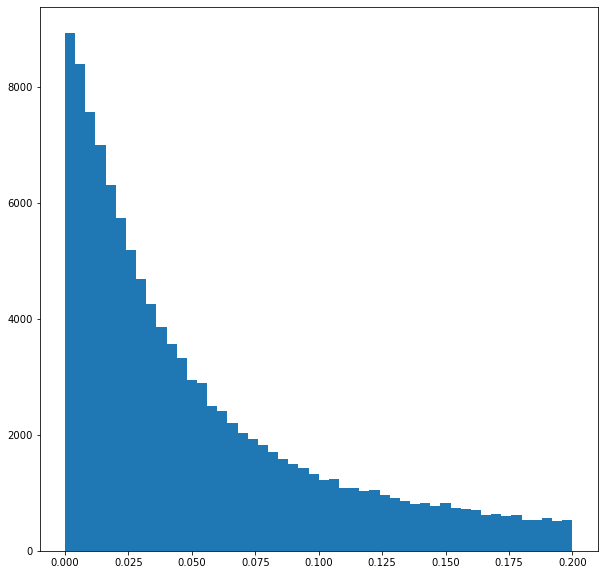

In [18]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["Acopl"], bins=50, range=(0.,0.2) )
#plt.yscale( "log" )

(array([ 311.,  304.,  365.,  551.,  678.,  781.,  880., 1077., 1232.,
        1391., 1381., 1545., 1678., 1809., 1896., 1992., 2148., 2289.,
        2247., 2438., 2335., 2483., 2359., 2574., 2568., 2597., 2631.,
        2637., 2662., 5386.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.], dtype=float32),
 <a list of 30 Patch objects>)

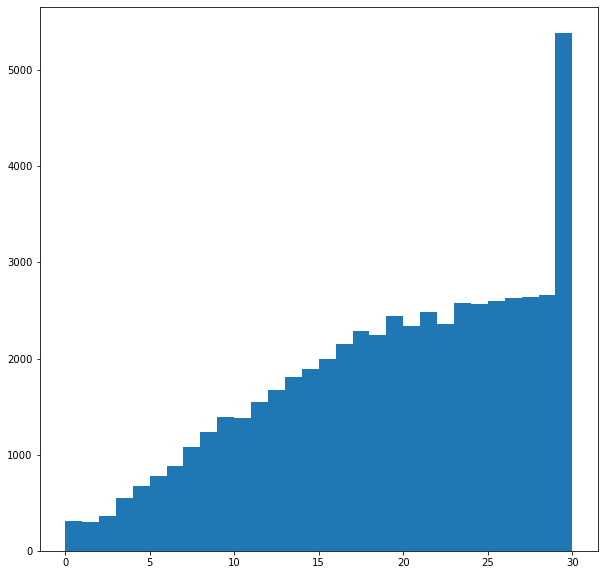

In [19]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["ExtraPfCands"], bins=30, range=(0.,30) )
#plt.yscale( "log" )

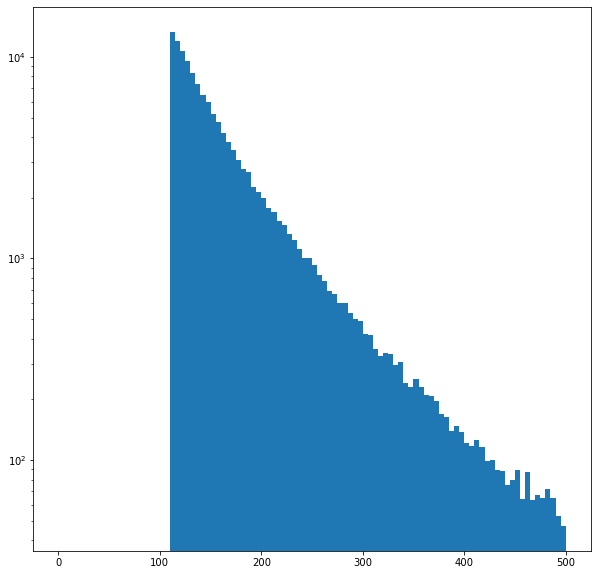

In [20]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["InvMass"], bins=100, range=(0.,500) )
plt.yscale( "log" )

52 85


(0.0, 0.15)

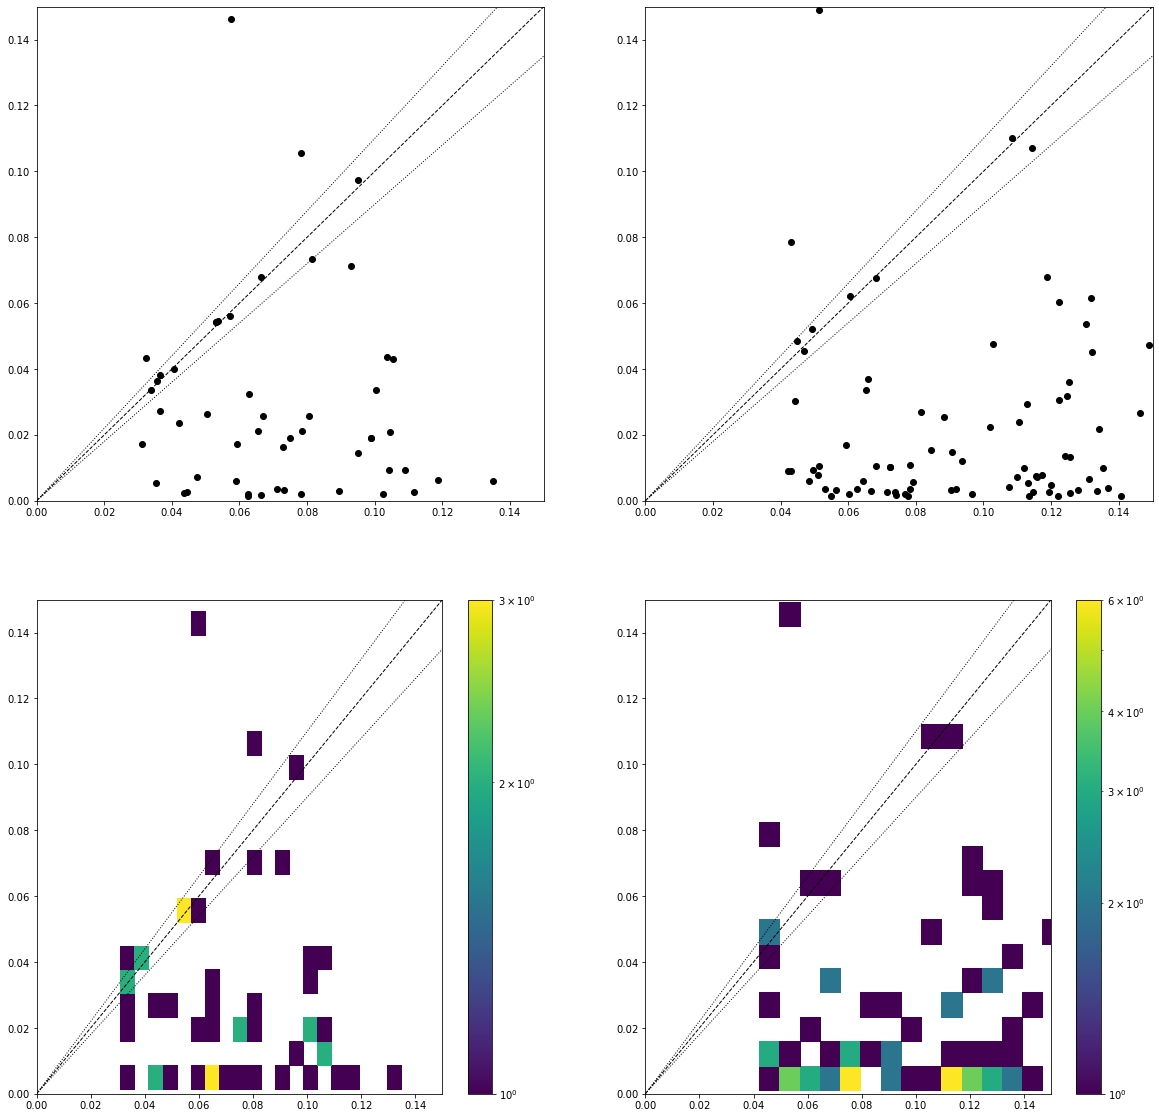

In [21]:
np.random.seed( 42 )msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )
#msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 0 )
#msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] > 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )

#msk1 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 23 )
#msk2 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 123 )
#msk1 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
#msk2 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

msk1_data = None
msk2_data = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 23 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

print ( len(df_data[ "Xi" ][ msk1_data ]), len(df_data[ "Xi" ][ msk2_data ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_data[ "Xi" ][ msk1_data ], df_data[ "XiMuMuPlus" ][ msk1_data ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_data[ "Xi" ][ msk2_data ], df_data[ "XiMuMuMinus" ][ msk2_data ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_data[ "Xi" ][ msk1_data ], df_data[ "XiMuMuPlus" ][ msk1_data ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_data[ "Xi" ][ msk2_data ], df_data[ "XiMuMuMinus" ][ msk2_data ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

In [22]:
df_bkg_list = []
df_counts_bkg_list = []

resample_factor = 20

#with h5py.File('output/output-UL2017B-PreSel-Rnd-Res20.h5', 'r') as f:
#with h5py.File('output/output-UL2017C1-PreSel-Rnd-Res20.h5', 'r') as f:    

fileNames_bkg = [
    'output/output-UL2017B-PreSel-Rnd-Res20.h5',
    'output/output-UL2017C1-PreSel-Rnd-Res20.h5',
    'output/output-UL2017E-PreSel-Rnd-Res20.h5',
    'output/output-UL2017F1-PreSel-Rnd-Res20.h5'
]

for file_ in fileNames_bkg:
    with h5py.File( file_, 'r' ) as f:
        print ( file_ )    
        print ( list(f.keys()) )
        dset = f['protons']
        print ( dset.shape )
        print ( dset[:,:] )
        
        dset_columns = f['columns']
        print ( dset_columns.shape )
        columns = list( dset_columns )
        print ( columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        print ( columns_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )
        
        dset_counts = f['event_counts']
        df_counts_bkg_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_bkg_list[-1] )
       
        chunk_size = 500000
        entries = dset.shape[0]
        start_ = list( range( 0, entries, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_bkg_list.append( pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str ) )
            print ( df_bkg_list[-1].head() )
            print ( len( df_bkg_list[-1] ) )
    

output/output-UL2017B-PreSel-Rnd-Res20.h5
['columns', 'event_counts', 'protons', 'selections']
(2141500, 38)
[[2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 [2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 [2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 ...
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', 

(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'Muon0Pt', b'Muon0Eta', b'Muon0Phi', b'Muon0VtxZ', b'Muon1Pt', b'Muon1Eta', b'Muon1Phi', b'Muon1VtxZ', b'PrimVertexZ', b'InvMass', b'ExtraPfCands', b'Acopl', b'XiMuMuPlus', b'XiMuMuMinus']
['Run', 'LumiSection', 'BX', 'EventNum', 'CrossingAngle', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2', 'Xi', 'T', 'ThX', 'ThY', 'Time', 'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP', 'Muon0Pt', 'Muon0Eta', 'Muon0Phi', 'Muon0VtxZ', 'Muon1Pt', 'Muon1Eta', 'Muon1Phi', 'Muon1VtxZ', 'PrimVertexZ', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMuPlus', 'XiMuMuMinus']
['All', 'M

        Run  LumiSection      BX     EventNum  CrossingAngle  MultiRP    Arm  \
0  299480.0        425.0  2974.0  605198080.0          130.0      0.0 -999.0   
1  299480.0        425.0   312.0  604867648.0          130.0      0.0 -999.0   
2  299480.0        425.0   312.0  604867648.0          130.0      0.0 -999.0   
3  299480.0        425.0   312.0  604867648.0          130.0      0.0 -999.0   
4  299480.0        425.0   312.0  604867648.0          130.0      0.0 -999.0   

   RPId1  RPId2   TrackX1  ...    Muon1Pt  Muon1Eta  Muon1Phi  Muon1VtxZ  \
0  123.0   -1.0  6.920837  ...  62.556580 -0.418288  0.046165  -2.800888   
1    3.0   -1.0  3.899292  ...  61.641869 -0.981610  1.011179  -2.499150   
2   23.0   -1.0  4.093567  ...  61.641869 -0.981610  1.011179  -2.499150   
3  103.0   -1.0  5.901123  ...  61.641869 -0.981610  1.011179  -2.499150   
4  123.0   -1.0  5.958252  ...  61.641869 -0.981610  1.011179  -2.499150   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus 

        Run  LumiSection      BX      EventNum  CrossingAngle  MultiRP    Arm  \
0  304333.0       1508.0  2586.0  2.221376e+09          120.0      0.0 -999.0   
1  304672.0          1.0   542.0  1.156690e+06          120.0      0.0 -999.0   
2  304672.0          1.0   542.0  1.156690e+06          120.0      0.0 -999.0   
3  304672.0          1.0   542.0  1.156690e+06          120.0      0.0 -999.0   
4  304672.0          1.0   542.0  1.156690e+06          120.0      1.0    1.0   

   RPId1  RPId2   TrackX1  ...    Muon1Pt  Muon1Eta  Muon1Phi  Muon1VtxZ  \
0   23.0   -1.0  9.104980  ...  52.041473 -1.751274  2.045912  -3.676906   
1   23.0   -1.0  3.526245  ...  51.847260  1.668693 -2.665128  -9.810744   
2  103.0   -1.0  7.308594  ...  51.847260  1.668693 -2.665128  -9.810744   
3  123.0   -1.0  7.375305  ...  51.847260  1.668693 -2.665128  -9.810744   
4  103.0  123.0  7.308594  ...  51.847260  1.668693 -2.665128  -9.810744   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuM

        Run  LumiSection      BX      EventNum  CrossingAngle  MultiRP    Arm  \
0  304062.0        731.0  2711.0  1.105863e+09          130.0      0.0 -999.0   
1  304062.0        731.0  2711.0  1.105863e+09          130.0      0.0 -999.0   
2  304062.0        731.0  2015.0  1.105471e+09          130.0      0.0 -999.0   
3  304062.0        731.0  2015.0  1.105471e+09          130.0      0.0 -999.0   
4  304062.0        731.0  2015.0  1.105471e+09          130.0      0.0 -999.0   

   RPId1  RPId2   TrackX1  ...    Muon1Pt  Muon1Eta  Muon1Phi  Muon1VtxZ  \
0   23.0   -1.0  5.247986  ...  51.404896 -0.856586  0.000117  -1.238781   
1  103.0   -1.0  6.892090  ...  51.404896 -0.856586  0.000117  -1.238781   
2   23.0   -1.0  2.570984  ...  50.958725 -0.864514 -2.920357   0.620059   
3   23.0   -1.0  6.519775  ...  50.958725 -0.864514 -2.920357   0.620059   
4  103.0   -1.0  7.364746  ...  50.958725 -0.864514 -2.920357   0.620059   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMu

        Run  LumiSection      BX      EventNum  CrossingAngle  MultiRP    Arm  \
0  304671.0        959.0  1601.0  1.581607e+09          130.0      0.0 -999.0   
1  304671.0        959.0  1601.0  1.581607e+09          130.0      0.0 -999.0   
2  304671.0        959.0  1601.0  1.581607e+09          130.0      0.0 -999.0   
3  304671.0        959.0  1601.0  1.581607e+09          130.0      0.0 -999.0   
4  304671.0        959.0  1601.0  1.581607e+09          130.0      1.0    1.0   

   RPId1  RPId2    TrackX1  ...    Muon1Pt  Muon1Eta  Muon1Phi  Muon1VtxZ  \
0   23.0   -1.0   4.399658  ...  53.277565  0.788097  1.166402   2.802351   
1   23.0   -1.0  16.189209  ...  53.277565  0.788097  1.166402   2.802351   
2  103.0   -1.0  10.047363  ...  53.277565  0.788097  1.166402   2.802351   
3  123.0   -1.0  10.036011  ...  53.277565  0.788097  1.166402   2.802351   
4  103.0  123.0  10.047363  ...  53.277565  0.788097  1.166402   2.802351   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl

['All', 'Muon', 'Vertex', 'ProtonsRnd']
All           100389900
Muon             952540
Vertex           864680
ProtonsRnd       756020
dtype: int64
[0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000]
[500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3003800]
0 500000
        Run  LumiSection      BX     EventNum  CrossingAngle  MultiRP    Arm  \
0  305045.0        267.0  1257.0  469638752.0          140.0      0.0 -999.0   
1  305045.0        267.0  1257.0  469638752.0          140.0      0.0 -999.0   
2  305045.0        267.0  1257.0  469638752.0          140.0      0.0 -999.0   
3  305045.0        267.0  1257.0  469638752.0          140.0      0.0 -999.0   
4  305045.0        267.0  1257.0  469638752.0          140.0      0.0 -999.0   

   RPId1  RPId2    TrackX1  ...    Muon1Pt  Muon1Eta  Muon1Phi  Muon1VtxZ  \
0    3.0   -1.0  14.951172  ...  59.079914  1.477132  2.898659  -1.525049   
1   23.0   -1.0  15.361694  ...  59.079914  1.477132  2.898659  -1.525049   
2   23.0  

In [23]:
df_bkg = pd.concat( df_bkg_list )

In [24]:
df_bkg

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,297227.0,53.0,2297.0,36577200.0,120.0,0.0,-999.0,103.0,-1.0,4.813721,...,63.807861,1.228711,-2.968801,7.642523,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
1,297227.0,53.0,2297.0,36577200.0,120.0,0.0,-999.0,123.0,-1.0,4.824036,...,63.807861,1.228711,-2.968801,7.642523,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
2,297227.0,53.0,2297.0,36577200.0,120.0,1.0,1.0,103.0,123.0,4.813721,...,63.807861,1.228711,-2.968801,7.642523,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
3,297227.0,55.0,1778.0,37547956.0,120.0,0.0,-999.0,23.0,-1.0,4.351562,...,56.025574,-1.328835,-2.660223,1.253821,1.257841,86.527367,21.0,0.609906,0.004207,0.022784
4,297227.0,55.0,1778.0,37547956.0,120.0,0.0,-999.0,23.0,-1.0,5.122253,...,56.025574,-1.328835,-2.660223,1.253821,1.257841,86.527367,21.0,0.609906,0.004207,0.022784
5,297227.0,55.0,1778.0,37547956.0,120.0,0.0,-999.0,23.0,-1.0,6.130554,...,56.025574,-1.328835,-2.660223,1.253821,1.257841,86.527367,21.0,0.609906,0.004207,0.022784
6,297227.0,55.0,1778.0,37547956.0,120.0,0.0,-999.0,23.0,-1.0,6.191284,...,56.025574,-1.328835,-2.660223,1.253821,1.257841,86.527367,21.0,0.609906,0.004207,0.022784
7,297227.0,55.0,1778.0,37547956.0,120.0,0.0,-999.0,123.0,-1.0,8.404175,...,56.025574,-1.328835,-2.660223,1.253821,1.257841,86.527367,21.0,0.609906,0.004207,0.022784
8,297227.0,56.0,1102.0,38791640.0,120.0,0.0,-999.0,3.0,-1.0,7.063232,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
9,297227.0,56.0,1102.0,38791640.0,120.0,0.0,-999.0,23.0,-1.0,6.926147,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855


In [25]:
df_counts_bkg = df_counts_bkg_list[0]
for idx in range( 1, len( df_counts_bkg_list ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list[idx] )
df_counts_bkg

All           869119560
Muon            8456020
Vertex          7782360
ProtonsRnd      6301680
dtype: int64

In [26]:
msk_invmass = ( df_bkg["InvMass"] >= 110. )
df_bkg = df_bkg[msk_invmass]
df_bkg

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
8,297227.0,56.0,1102.0,38791640.0,120.0,0.0,-999.0,3.0,-1.0,7.063232,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
9,297227.0,56.0,1102.0,38791640.0,120.0,0.0,-999.0,23.0,-1.0,6.926147,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
10,297227.0,56.0,1102.0,38791640.0,120.0,1.0,0.0,3.0,23.0,7.063232,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
11,297227.0,56.0,1182.0,38257820.0,120.0,0.0,-999.0,123.0,-1.0,5.090332,...,82.668289,1.051386,1.033899,2.199047,2.202265,181.937073,16.0,0.006314,0.061436,0.003189
12,297227.0,57.0,1467.0,39075120.0,120.0,0.0,-999.0,103.0,-1.0,8.020508,...,53.342525,-1.323256,-1.212659,-3.412033,-3.414031,116.194427,9.0,0.099704,0.003014,0.027288
13,297227.0,57.0,1467.0,39075120.0,120.0,0.0,-999.0,123.0,-1.0,5.676941,...,53.342525,-1.323256,-1.212659,-3.412033,-3.414031,116.194427,9.0,0.099704,0.003014,0.027288
14,297227.0,57.0,1467.0,39075120.0,120.0,0.0,-999.0,123.0,-1.0,12.030518,...,53.342525,-1.323256,-1.212659,-3.412033,-3.414031,116.194427,9.0,0.099704,0.003014,0.027288
18,297227.0,58.0,1337.0,40362008.0,120.0,0.0,-999.0,3.0,-1.0,7.391113,...,68.791176,-0.649998,1.332961,-4.118179,-4.119335,228.323425,10.0,0.271141,0.028539,0.011619
19,297227.0,58.0,1337.0,40362008.0,120.0,0.0,-999.0,23.0,-1.0,7.219421,...,68.791176,-0.649998,1.332961,-4.118179,-4.119335,228.323425,10.0,0.271141,0.028539,0.011619
20,297227.0,58.0,1337.0,40362008.0,120.0,1.0,0.0,3.0,23.0,7.391113,...,68.791176,-0.649998,1.332961,-4.118179,-4.119335,228.323425,10.0,0.271141,0.028539,0.011619


In [27]:
#df_bkg_events = df_bkg.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
#df_bkg_events = df_bkg_events[ ~df_bkg_events.index.duplicated(keep='first') ]
#print ( len( df_bkg_events ) )

In [28]:
#fig = plt.figure( figsize=(10,10) )
#plt.hist( df_data_events["Acopl"], bins=50, range=(0.,0.2) )
#plt.hist( df_data_events["ExtraPfCands"], bins=30, range=(0.,30) )
#plt.hist( df_data_events["InvMass"], bins=100, range=(0.,500) )
#plt.yscale( "log" )

1060 1670


(0.0, 0.15)

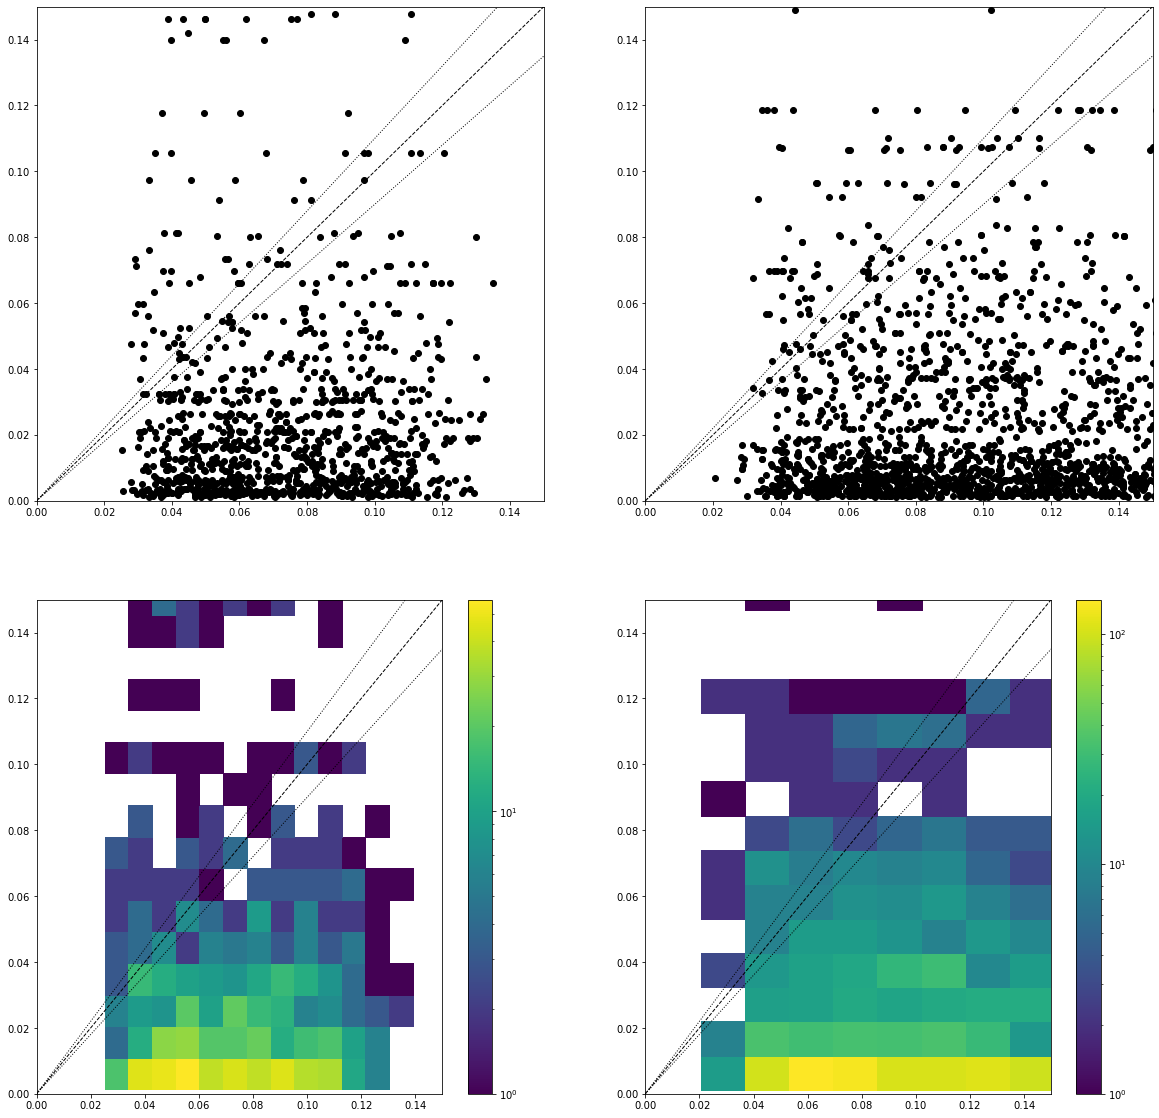

In [29]:
msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 0 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] > 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )

msk1_bkg = None
msk2_bkg = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 23 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )

print ( len(df_bkg[ "Xi" ][ msk1_bkg ]), len(df_bkg[ "Xi" ][ msk2_bkg ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "XiMuMuPlus" ][ msk1_bkg ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_bkg[ "Xi" ][ msk2_bkg ], df_bkg[ "XiMuMuMinus" ][ msk2_bkg ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "XiMuMuPlus" ][ msk1_bkg ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_bkg[ "Xi" ][ msk2_bkg ], df_bkg[ "XiMuMuMinus" ][ msk2_bkg ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

[0 0 0 2 1 0 0 1 0 0 1 1 1 0 2 1 0 2 1 0 3 1 0 2 4 7 2 0 1 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
[0 0 2 1 0 1 2 2 0 0 3 0 3 0 2 1 0 1 0 3 1 2 1 0 3 4 0 1 1 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
y max. = 12.291502622129181


(0.0, 12.291502622129181)

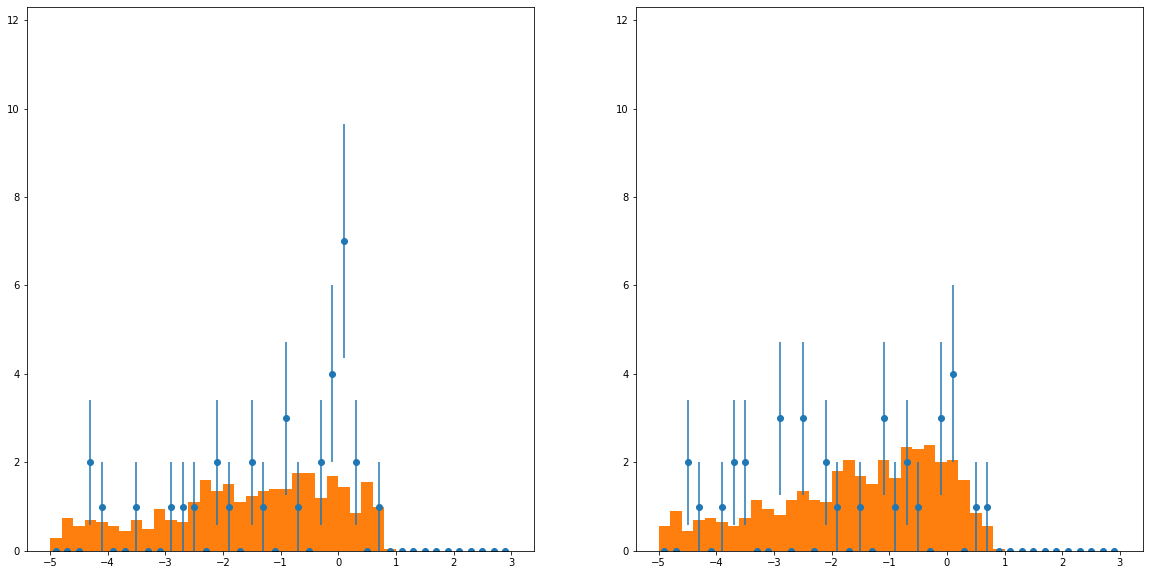

In [30]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

bins_ = 40
range_ = (-5.,3.)

#axes[0].hist( ( 1. - df_data[ "Xi" ][ msk1 ] / df_data[ "XiMuMuPlus" ][ msk1 ] ), bins=10, range=(-5.,3.), weights=weights_1 )
#axes[1].hist( ( 1. - df_data[ "Xi" ][ msk2 ] / df_data[ "XiMuMuMinus" ][ msk2 ] ), bins=10, range=(-5.,3.), weights=weights_2 )

vals_1 = ( 1. - df_data[ "Xi" ][ msk1_data ] / df_data[ "XiMuMuPlus" ][ msk1_data ] )
counts_1, bin_edges_1 = np.histogram( vals_1, bins=bins_, range=range_ )
#counts_1_w, _ = np.histogram( vals_1, bins=bins_, range=range_, weights=None )
#errors_1 = np.sqrt( counts_1 ) * ( counts_1_w / counts_1 )
errors_1 = np.sqrt( counts_1 )
print ( counts_1, bin_edges_1 )

bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#axes[0].errorbar(bin_centres_1, counts_1_w, yerr=errors_1, fmt='o')
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

vals_2 = ( 1. - df_data[ "Xi" ][ msk2_data ] / df_data[ "XiMuMuMinus" ][ msk2_data ] )
counts_2, bin_edges_2 = np.histogram( vals_2, bins=bins_, range=range_ )
#counts_2_w, _ = np.histogram( vals_2, bins=bins_, range=range_, weights=None )
#errors_2 = np.sqrt( counts_2 ) * ( counts_2_w / counts_2 )
errors_2 = np.sqrt( counts_2 )
print ( counts_2, bin_edges_2 )

bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
#axes[1].errorbar(bin_centres_2, counts_2_w, yerr=errors_2, fmt='o')
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

weights_1 = None
if resample_factor > 1:
    weights_1 = np.full_like( df_bkg[ "Xi" ][ msk1_bkg ], ( 1./resample_factor ) )

vals_bkg_1 = ( 1. - df_bkg[ "Xi" ][ msk1_bkg ] / df_bkg[ "XiMuMuPlus" ][ msk1_bkg ] )
axes[0].hist( vals_bkg_1, bins=bins_, range=range_, weights=weights_1 )
axes[0].set_ylim( top=y_max )

weights_2 = None
if resample_factor > 1:
    weights_2 = np.full_like( df_bkg[ "Xi" ][ msk2_bkg ], ( 1./resample_factor ) )
    
vals_bkg_2 = ( 1. - df_bkg[ "Xi" ][ msk2_bkg ] / df_bkg[ "XiMuMuMinus" ][ msk2_bkg ] )
axes[1].hist( vals_bkg_2, bins=bins_, range=range_, weights=weights_2 )
axes[1].set_ylim( top=y_max )

In [31]:
#np.info( h5py.File )

5785     -1.711910e-05
39811     7.711315e-07
45170    -5.318766e-05
936       3.860024e-06
93817    -1.272517e-05
157144   -3.580272e-05
197500   -5.277169e-05
13880    -4.062912e-05
27904    -9.385056e-05
108797    5.210244e-05
276753   -4.062912e-05
Name: ThY, dtype: float32
101961   -0.000036
47139     0.000098
102511    0.000096
183292    0.000053
254521   -0.000021
347199    0.000026
398981   -0.000180
Name: ThY, dtype: float32
y max. = 13.65685424949238


(0.0, 13.65685424949238)

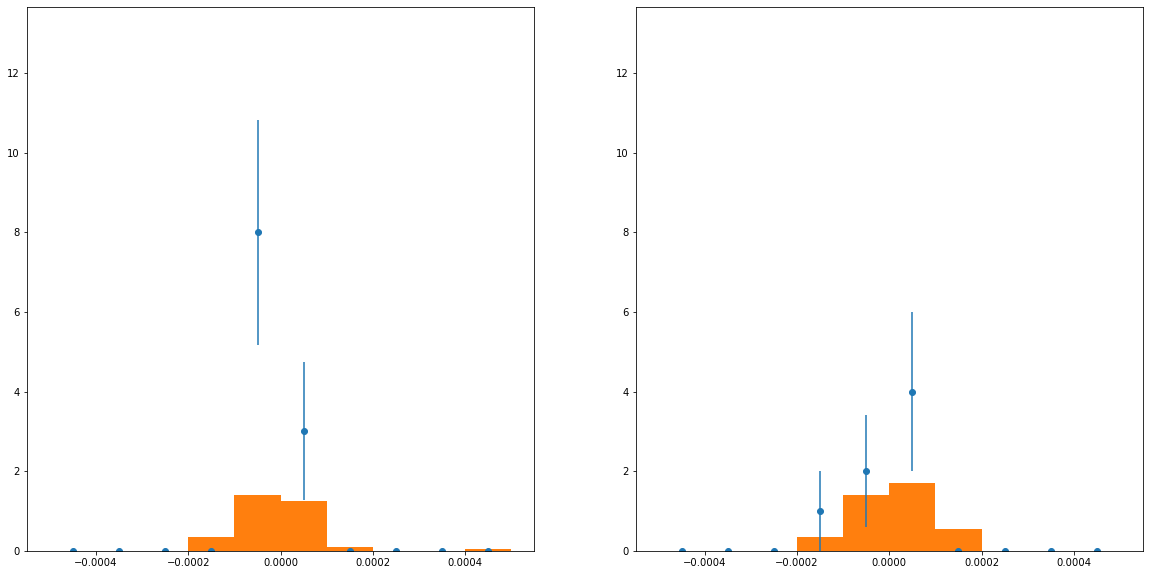

In [32]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

#var_ = "Xi"
#bins_ = 10
#range_ = (0.,0.2)

#var_ = "ThX"
#bins_ = 10
#range_ = (-0.0005,0.0005)

var_ = "ThY"
bins_ = 10
range_ = (-0.0005,0.0005)

#var_ = "T"
#bins_ = 10
#range_ = (-4.,0.)

#var_ = "Time"
#bins_ = 20
#range_ = (-0.5,0.5)

msk1_data_sel = ( vals_1 >= -0.20 ) & ( vals_1 <= +0.20 )
print ( df_data[ var_ ][ msk1_data ][ msk1_data_sel ] )

counts_1, bin_edges_1 = np.histogram( df_data[ var_ ][ msk1_data ][ msk1_data_sel ], bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

msk2_data_sel = ( vals_2 >= -0.20 ) & ( vals_2 <= +0.20 )
print ( df_data[ var_ ][ msk2_data ][ msk2_data_sel ] )

counts_2, bin_edges_2 = np.histogram( df_data[ var_ ][ msk2_data ][ msk2_data_sel ], bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

msk1_bkg_sel = ( vals_bkg_1 >= -0.20 ) & ( vals_bkg_1 <= +0.20 )
axes[0].hist( df_bkg[ var_ ][ msk1_bkg ][ msk1_bkg_sel ], bins=bins_, range=range_, weights=weights_1[ msk1_bkg_sel ] )
axes[0].set_ylim( top=y_max )

msk2_bkg_sel = ( vals_bkg_2 >= -0.20 ) & ( vals_bkg_2 <= +0.20 )
axes[1].hist( df_bkg[ var_ ][ msk2_bkg ][ msk2_bkg_sel ], bins=bins_, range=range_, weights=weights_2[ msk2_bkg_sel ] )
axes[1].set_ylim( top=y_max )